# Exploratory Data Analysis

These are the imports required for this exploratory notebook.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from scipy import stats

## Loading the data set
Loading the initial dataset called application train. We will conduct an exploratory data analysis on this data set before looking at the other data sets available as this is the data set with the target variable for our predictions.

In [2]:
app_train = pd.read_csv('../data/raw/application_train.csv')
app_test = pd.read_csv('../data/raw/application_test.csv')

print(f"Shape of application train dataset: {app_train.shape}")
app_train.columns.values

Shape of application train dataset: (307511, 122)


array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [3]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Data Quality Checks
### Class Imbalance
An assumption I have made due to prior reading suggests that credit data sets such as this tend to have imbalanced class for paid vs unpaid. As seen in the table above's 'TARGET' column there are 4 instances of 0 in and 1 instance of 1. This supports the idea this imbalance may be present. This suggests we should check the balance of the 'TARGET' variable.

Percentage of unpaid loans: 8.07%


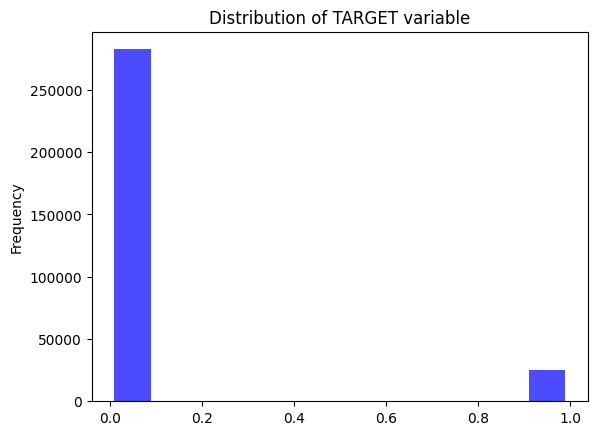

In [4]:
app_train['TARGET'].astype(int).plot.hist(rwidth=0.8, color='blue', alpha=0.7)
plt.title('Distribution of TARGET variable')
unpaid_percentage = app_train[app_train['TARGET'] == 1].shape[0] / app_train.shape[0] * 100
print(f"Percentage of unpaid loans: {unpaid_percentage:.2f}%")

The assumption of imbalance was correct and only 8.07% of the loans were unpaid. Once we get to the modeling stage we will assign weight to the classes to counter act this imbalance. 

### Data Errors and Outliers

In this step we are going to try to identify any columns with errors or outliers. As there are 106 columns this is too many to manually go through. We will use a function to score the most problematic rows to analyse/fix first.

In [5]:
def column_diagnostics(df, z_thresh=4, rare_frac=0.005):
    """Return one row per column with counts of potential issues."""
    rows = []

    for col in df.columns:
        s = df[col]
        rec = {
            "dtype"      : s.dtype,
            "n_missing"  : s.isna().sum(),
            "n_unique"   : s.nunique(dropna=False),
            "outliers_z" : 0,
            "outliers_iqr": 0,
            "rare_levels": 0,
            "min"        : np.nan,
            "max"        : np.nan,
        }

        # ----- numeric -------------------------------------------------------
        if pd.api.types.is_numeric_dtype(s):
            z = stats.zscore(s, nan_policy="omit")
            rec["outliers_z"] = (np.abs(z) >= z_thresh).sum()

            q1, q3 = s.quantile([0.25, 0.75])
            iqr    = q3 - q1
            mask_iqr = (s < q1 - 3 * iqr) | (s > q3 + 3 * iqr)
            rec["outliers_iqr"] = mask_iqr.sum()

            rec["min"], rec["max"] = s.min(), s.max()

        # ----- categorical / object -----------------------------------------
        else:
            counts = s.value_counts(dropna=False, normalize=True)
            rec["rare_levels"] = (counts < rare_frac).sum()

        rows.append(rec)

    diag = pd.DataFrame(rows, index=df.columns)
    diag["suspect_cells"] = diag[
        ["outliers_z", "outliers_iqr", "rare_levels", "n_missing"]
    ].sum(axis=1)

    return diag.sort_values("suspect_cells", ascending=False)

summary = column_diagnostics(app_train)
summary.head(20)


,dtype,n_missing,n_unique,outliers_z,outliers_iqr,rare_levels,min,max,suspect_cells
NONLIVINGAPARTMENTS_AVG,float64,213514,387,600,8942,0,0.0,1.0,223056
NONLIVINGAPARTMENTS_MEDI,float64,213514,215,598,8720,0,0.0,1.0,222832
NONLIVINGAPARTMENTS_MODE,float64,213514,168,555,8057,0,0.0,1.0,222126
COMMONAREA_MEDI,float64,214865,3203,1097,3780,0,0.0,1.0,219742
COMMONAREA_MODE,float64,214865,3129,1073,3763,0,0.0,1.0,219701
COMMONAREA_AVG,float64,214865,3182,1102,3696,0,0.0,1.0,219663
LIVINGAPARTMENTS_MEDI,float64,210199,1098,887,2653,0,0.0,1.0,213739
LIVINGAPARTMENTS_AVG,float64,210199,1869,863,2656,0,0.0,1.0,213718
LIVINGAPARTMENTS_MODE,float64,210199,737,887,2526,0,0.0,1.0,213612
FONDKAPREMONT_MODE,object,210295,5,0,0,0,NaN,NaN,210295


### Missing Values

Following this we are going to check the data set for missing values. We will create a function that will generate a table to show this.

In [6]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)
    
    # Create a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: 'Percentage'})
    
    # Sort the table by percentage of missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        'Percentage', ascending=False).round(1)
    
    # Summary of missing values
    print(f"Your selected dataframe has {df.shape[0]} rows and {df.shape[1]} columns.\n"
          f"There are {mis_val_table_ren_columns.shape[0]} columns that have missing values.")
    
    return mis_val_table_ren_columns

In [7]:
missing_values_table(app_train).head(10)

Your selected dataframe has 307511 rows and 122 columns.
There are 67 columns that have missing values.


,Missing Values,Percentage
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


This shows there is a large amount of data missing. This will have to be handled in the future either by dropping some of these columns, imputing them or using a model that can handle missing values for us. It is not possible to know what features will improve the model's performance. To avoid mistakenly removing useful ones we will not drop or alter any yet.

### Column Types

We will check the data types present. Following this we will deal with the different types to make them useful for the models we build.

In [8]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

We will focus on the categorical columns and we will encode them. For columns with 2 we will label encode these columns, for the others we will one hot encode these columns. We may need to alter this approach for the columns with very high numbers of categories as the diamentionality will grow dramatically.

In [9]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0).sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

### Data Encoding

In [10]:
# Create a label encoder object
le = LabelEncoder()

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

In [11]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [12]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)
